In [ ]:
# --------------------------------
# ----- Variables del modelo -----
# --------------------------------
ACCION = 'AAPL'
FECHA_INICIO = '2019-01-01'
FECHA_FINAL  = '2019-12-30'

In [ ]:
# Machine learning
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
  
# For data manipulation
import pandas as pd
import numpy as np
  
# To plot
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

# Carga de datos
from pandas_datareader.data import DataReader
  
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Metricas
from sklearn.metrics import precision_score


In [ ]:
dataframe = DataReader(
    ACCION, 
    data_source='yahoo', 
    start=FECHA_INICIO, 
    end=FECHA_FINAL
)
dataframe["Date"] = dataframe.index
dataframe

,High,Low,Open,Close,Volume,Adj Close,Date
Date,,,,,,,
2019-01-02,39.712502,38.557499,38.722500,39.480000,148158800.0,38.326290,2019-01-02
2019-01-03,36.430000,35.500000,35.994999,35.547501,365248800.0,34.508709,2019-01-03
2019-01-04,37.137501,35.950001,36.132500,37.064999,234428400.0,35.981861,2019-01-04
2019-01-07,37.207500,36.474998,37.174999,36.982498,219111200.0,35.901779,2019-01-07
2019-01-08,37.955002,37.130001,37.389999,37.687500,164101200.0,36.586178,2019-01-08
...,...,...,...,...,...,...,...
2019-12-23,71.062500,70.092499,70.132500,71.000000,98572000.0,69.960793,2019-12-23
2019-12-24,71.222504,70.730003,71.172501,71.067497,48478800.0,70.027313,2019-12-24
2019-12-26,72.495003,71.175003,71.205002,72.477501,93121200.0,71.416679,2019-12-26


In [ ]:
# Formateamos los datos

df = pd.DataFrame({
    "Open": dataframe['Open'],
    "Volume": dataframe['Volume'],
    "High": dataframe['High'],
    "Low": dataframe['Low'],
    "Close": dataframe['Close'],
    "Date": dataframe['Date'].astype(str),
    "Adjclose": dataframe['Adj Close'],
})
df.head()

,Open,Volume,High,Low,Close,Date,Adjclose
Date,,,,,,,
2019-01-02,38.722500,148158800.0,39.712502,38.557499,39.480000,2019-01-02,38.326290
2019-01-03,35.994999,365248800.0,36.430000,35.500000,35.547501,2019-01-03,34.508709
2019-01-04,36.132500,234428400.0,37.137501,35.950001,37.064999,2019-01-04,35.981861
2019-01-07,37.174999,219111200.0,37.207500,36.474998,36.982498,2019-01-07,35.901779
2019-01-08,37.389999,164101200.0,37.955002,37.130001,37.687500,2019-01-08,36.586178


In [ ]:
# Changes The Date column as index columns
df.index = pd.to_datetime(df['Date'])
df
  
# drop The original date column
df = df.drop(['Date'], axis='columns')
df

,Open,Volume,High,Low,Close,Adjclose
Date,,,,,,
2019-01-02,38.722500,148158800.0,39.712502,38.557499,39.480000,38.326290
2019-01-03,35.994999,365248800.0,36.430000,35.500000,35.547501,34.508709
2019-01-04,36.132500,234428400.0,37.137501,35.950001,37.064999,35.981861
2019-01-07,37.174999,219111200.0,37.207500,36.474998,36.982498,35.901779
2019-01-08,37.389999,164101200.0,37.955002,37.130001,37.687500,36.586178
...,...,...,...,...,...,...
2019-12-23,70.132500,98572000.0,71.062500,70.092499,71.000000,69.960793
2019-12-24,71.172501,48478800.0,71.222504,70.730003,71.067497,70.027313
2019-12-26,71.205002,93121200.0,72.495003,71.175003,72.477501,71.416679


In [ ]:

# Create predictor variables
df['Open-Close'] = df.Open - df.Close
df['High-Low'] = df.High - df.Low
  
# Store all predictor variables in a variable X
X = df[['Open-Close', 'High-Low']]
X.head()

,Open-Close,High-Low
Date,,
2019-01-02,-0.757500,1.155003
2019-01-03,0.447498,0.930000
2019-01-04,-0.932499,1.187500
2019-01-07,0.192501,0.732502
2019-01-08,-0.297501,0.825001


In [ ]:

# Target variables
y = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)
y

array([0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0])

In [ ]:
split_percentage = 0.8
split = int(split_percentage*len(df))
  
# Train data set
X_train = X[:split]
y_train = y[:split]
  
# Test data set
X_test = X[split:]
y_test = y[split:]

In [ ]:

# Support vector classifier
cls = SVC().fit(X_train, y_train)

y_prediction = cls.predict(X_test)

print(precision_score(y_test, y_prediction, average='micro'))

print(y_prediction)
print(y_test)


0.6274509803921569
[1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1]
[1 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 1 1 1 0 1
 1 1 1 1 1 0 1 0 1 1 1 0 1 0]


In [ ]:
df['Predicted_Signal'] = cls.predict(X)

In [ ]:
# Calculate daily returns
df['Return'] = df.Close.pct_change()

In [ ]:

# Calculate strategy returns
df['Strategy_Return'] = df.Return * df.Predicted_Signal.shift(1)

In [ ]:
# Calculate Cumulutive returns
df['Cum_Ret'] = df['Return'].cumsum()
df.tail()

,Open,Volume,High,Low,Close,Adjclose,Open-Close,High-Low,Predicted_Signal,Return,Strategy_Return,Cum_Ret
Date,,,,,,,,,,,,
2019-12-23,70.132500,98572000.0,71.062500,70.092499,71.000000,69.960793,-0.867500,0.970001,1,0.016318,0.016318,0.621844
2019-12-24,71.172501,48478800.0,71.222504,70.730003,71.067497,70.027313,0.105003,0.492500,1,0.000951,0.000951,0.622794
2019-12-26,71.205002,93121200.0,72.495003,71.175003,72.477501,71.416679,-1.272499,1.320000,0,0.019840,0.019840,0.642635
2019-12-27,72.779999,146266000.0,73.492500,72.029999,72.449997,71.389557,0.330002,1.462502,1,-0.000379,-0.000000,0.642255
2019-12-30,72.364998,144114400.0,73.172501,71.305000,72.879997,71.813278,-0.514999,1.867500,1,0.005935,0.005935,0.648190


In [ ]:
# Plot Strategy Cumulative returns 
df['Cum_Strategy'] = df['Strategy_Return'].cumsum()
df

,Open,Volume,High,Low,Close,Adjclose,Open-Close,High-Low,Predicted_Signal,Return,Strategy_Return,Cum_Ret,Cum_Strategy
Date,,,,,,,,,,,,,
2019-01-02,38.722500,148158800.0,39.712502,38.557499,39.480000,38.326290,-0.757500,1.155003,1,NaN,NaN,NaN,NaN
2019-01-03,35.994999,365248800.0,36.430000,35.500000,35.547501,34.508709,0.447498,0.930000,1,-0.099607,-0.099607,-0.099607,-0.099607
2019-01-04,36.132500,234428400.0,37.137501,35.950001,37.064999,35.981861,-0.932499,1.187500,1,0.042689,0.042689,-0.056918,-0.056918
2019-01-07,37.174999,219111200.0,37.207500,36.474998,36.982498,35.901779,0.192501,0.732502,1,-0.002226,-0.002226,-0.059144,-0.059144
2019-01-08,37.389999,164101200.0,37.955002,37.130001,37.687500,36.586178,-0.297501,0.825001,1,0.019063,0.019063,-0.040081,-0.040081
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-23,70.132500,98572000.0,71.062500,70.092499,71.000000,69.960793,-0.867500,0.970001,1,0.016318,0.016318,0.621844,0.672386
2019-12-24,71.172501,48478800.0,71.222504,70.730003,71.067497,70.027313,0.105003,0.492500,1,0.000951,0.000951,0.622794,0.673337
2019-12-26,71.205002,93121200.0,72.495003,71.175003,72.477501,71.416679,-1.272499,1.320000,0,0.019840,0.019840,0.642635,0.693177


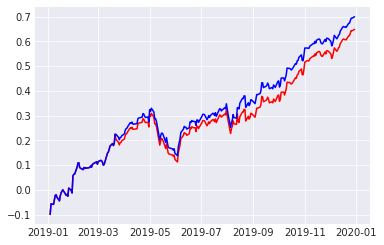

In [ ]:

import matplotlib.pyplot as plt
%matplotlib inline
  
plt.plot(df['Cum_Ret'],color='red')
plt.plot(df['Cum_Strategy'],color='blue')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2e251de5-0dc4-4401-98b7-759471e83f8e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>